In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
# plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
matplotlib.rcParams['lines.linewidth'] = 0.75


In [3]:
# Get seedlist
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])
print(seed_list)

[382084, 959804, 880775, 707317, 638913, 160861, 468738, 814726, 792012, 752389]


In [4]:
# Set mode to train or test
mode = "test"
print(mode)

test


In [5]:
experiment_list=['sensetx_t24_dummy-3task_g0.997-n0.7-random_pref-intrp4']

In [6]:
results = {}
for experiment in experiment_list:
    results[experiment]={}        
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        tag = experiment + '-' + str(seed_no)
        cur_folder = os.getcwd()
        exp_results_folder = os.path.join(cur_folder,"results", experiment, mode) # experiment folder
        exp_results_file = os.path.join(exp_results_folder, tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary

In [7]:
# Get list of locations and years in the experimental data
location_list   = list(results[experiment_list[0]][seed_list[0]].keys())
year_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]].keys())
pref_list       = list(results[experiment_list[0]][seed_list[0]][location_list[0]][year_list[0]].keys())

In [8]:
for experiment in experiment_list:
    results[experiment]["minimum"] = {}
    results[experiment]["first_q"] = {}
    results[experiment]["average"] = {}
    results[experiment]["third_q"] = {}
    results[experiment]["maximum"] = {}
    for location in location_list:
        results[experiment]["minimum"][location] = {}
        results[experiment]["first_q"][location] = {}
        results[experiment]["average"][location] = {}
        results[experiment]["third_q"][location] = {}
        results[experiment]["maximum"][location] = {}
        for year in year_list:
            results[experiment]["minimum"][location][year] = {}
            results[experiment]["first_q"][location][year] = {}
            results[experiment]["average"][location][year] = {}
            results[experiment]["third_q"][location][year] = {}
            results[experiment]["maximum"][location][year] = {}
            for pref in pref_list:
                results[experiment]["minimum"][location][year][pref] = {}
                results[experiment]["first_q"][location][year][pref] = {}
                results[experiment]["average"][location][year][pref] = {}
                results[experiment]["third_q"][location][year][pref] = {}
                results[experiment]["maximum"][location][year][pref] = {}

In [9]:
# get min, avg and max avg_sense_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            for pref in pref_list:
                dummy = []
                for seed in seed_list:
                    avgsnsrwd = results[experiment][seed][location][year][pref]['sense_reward_log'].mean()
                    results[experiment][seed][location][year][pref]['avg_sense_reward'] = avgsnsrwd # add new entry
                    dummy.append(avgsnsrwd)
                results[experiment]["minimum"][location][year][pref]['avg_sense_reward'] = np.min(dummy)
                results[experiment]["first_q"][location][year][pref]['avg_sense_reward'] = np.percentile(dummy, 25)
                results[experiment]["average"][location][year][pref]['avg_sense_reward'] = np.mean(dummy)
                results[experiment]["third_q"][location][year][pref]['avg_sense_reward'] = np.percentile(dummy, 75)
                results[experiment]["maximum"][location][year][pref]['avg_sense_reward'] = np.max(dummy)
                
# get min, avg and max avg_tx_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            for pref in pref_list:
                dummy = []
                for seed in seed_list:
                    avgtxrwd = results[experiment][seed][location][year][pref]['tx_reward_log'].mean()
                    results[experiment][seed][location][year][pref]['avg_tx_reward'] = avgtxrwd # add new entry
                    dummy.append(avgtxrwd)
                results[experiment]["minimum"][location][year][pref]['avg_tx_reward'] = np.min(dummy)
                results[experiment]["first_q"][location][year][pref]['avg_tx_reward'] = np.percentile(dummy, 25)
                results[experiment]["average"][location][year][pref]['avg_tx_reward'] = np.mean(dummy)
                results[experiment]["third_q"][location][year][pref]['avg_tx_reward'] = np.percentile(dummy, 75)
                results[experiment]["maximum"][location][year][pref]['avg_tx_reward'] = np.max(dummy)
            
# get min, avg and max avg_enp_reward
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            for pref in pref_list:
                dummy = []
                for seed in seed_list:
                    avgenprwd = results[experiment][seed][location][year][pref]['enp_reward_log'].mean()
                    results[experiment][seed][location][year][pref]['avg_enp_reward'] = avgenprwd # add new entry
                    dummy.append(avgenprwd)
                results[experiment]["minimum"][location][year][pref]['avg_enp_reward'] = np.min(dummy)
                results[experiment]["first_q"][location][year][pref]['avg_enp_reward'] = np.percentile(dummy, 25)
                results[experiment]["average"][location][year][pref]['avg_enp_reward'] = np.mean(dummy)
                results[experiment]["third_q"][location][year][pref]['avg_enp_reward'] = np.percentile(dummy, 75)
                results[experiment]["maximum"][location][year][pref]['avg_enp_reward'] = np.max(dummy)

# get min, avg and max downtimes
for experiment in experiment_list:
    for location in location_list:
        for year in year_list:
            for pref in pref_list:
                dummy = []
                for seed in seed_list:
                    dummy.append(results[experiment][seed][location][year][pref]['downtimes'])
                results[experiment]["minimum"][location][year][pref]['downtimes'] = np.min(dummy)
                results[experiment]["first_q"][location][year][pref]['downtimes'] = np.percentile(dummy, 25)
                results[experiment]["average"][location][year][pref]['downtimes'] = np.mean(dummy)
                results[experiment]["third_q"][location][year][pref]['downtimes'] = np.percentile(dummy, 75)
                results[experiment]["maximum"][location][year][pref]['downtimes'] = np.max(dummy)

In [10]:
# location = 'tokyo'
# for pref in pref_list:
#     for experiment in experiment_list:
#         exp_tag = experiment+'-p'+str(pref)
#         results[exp_tag] = {}
#         for seed in seed_list:
#             results[exp_tag][seed] = {}
#             for location in location_list:
#                 results[exp_tag][seed][location] = {}
#                 for year in year_list:
#                     results[exp_tag][seed][location][year] =  allpref_results[experiment][seed][location][year][pref]

In [11]:
plot_pref_list = pref_list[2:]

tokyo


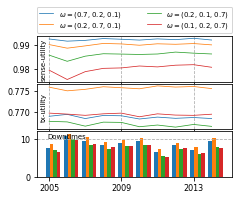

In [12]:
# Downtimes and Sense Rewards

single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618 *1.2

fig, axs = plt.subplots(nrows=3,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

sense_reward_ax  = axs[0]
tx_reward_ax  = axs[1]
# enp_reward_ax  = axs[2]
downtimes_ax = axs[2]

location = 'tokyo'
print(location)
######################################################################################################################
# avg_sense_reward
for experiment in experiment_list:
    for pref in plot_pref_list:
        min_data = [results[experiment]["minimum"][location][year][pref]['avg_sense_reward'] for year in year_list]
        qt1_data = [results[experiment]["first_q"][location][year][pref]['avg_sense_reward'] for year in year_list]
        avg_data = [results[experiment]["average"][location][year][pref]['avg_sense_reward'] for year in year_list]
        qt3_data = [results[experiment]["third_q"][location][year][pref]['avg_sense_reward'] for year in year_list]
        max_data = [results[experiment]["maximum"][location][year][pref]['avg_sense_reward'] for year in year_list]

    
#         sense_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, 
#     #                                  color=experiment_color[experiment],
#                                      alpha=0.2)
        sense_reward_ax.plot(year_list, avg_data, 
    #                          color=experiment_color[experiment], 
    #                          label=experiment_label[experiment]
                             label = r'$\omega=$'+ str(pref)
                            )
    
sense_reward_ax.text(0.035,0.5, 'sense-utility', 
         size='x-small', ha='center', va='center', 
        rotation='vertical',  transform=sense_reward_ax.transAxes)
# sense_reward_ax.set_title('sense utility')
# sense_reward_ax.set_ylabel('sense utility')    
sense_reward_ax.legend(loc="lower left",
                       ncol=2,
                       fontsize='x-small',
                       bbox_to_anchor=(-0.02,1.0,1.04,1),
                        mode="expand",
                       labelspacing=0.1,)
sense_reward_ax.grid(which='major', axis='x', linestyle='--')
######################################################################################################################
# avg_tx_reward
for experiment in experiment_list:
    for pref in plot_pref_list:
        min_data = [results[experiment]["minimum"][location][year][pref]['avg_tx_reward'] for year in year_list]
        qt1_data = [results[experiment]["first_q"][location][year][pref]['avg_tx_reward'] for year in year_list]
        avg_data = [results[experiment]["average"][location][year][pref]['avg_tx_reward'] for year in year_list]
        qt3_data = [results[experiment]["third_q"][location][year][pref]['avg_tx_reward'] for year in year_list]
        max_data = [results[experiment]["maximum"][location][year][pref]['avg_tx_reward'] for year in year_list]

    
#         tx_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, 
#     #                                  color=experiment_color[experiment],
#                                      alpha=0.2)
        tx_reward_ax.plot(year_list, avg_data, 
    #                          color=experiment_color[experiment], 
    #                          label=experiment_label[experiment]
                             label = str(pref)
                            )
    
tx_reward_ax.text(0.035,0.5, 'tx-utility', 
         size='x-small', ha='center', va='center', 
        rotation='vertical',  transform=tx_reward_ax.transAxes)
# tx_reward_ax.set_title('tx utility')
# tx_reward_ax.set_ylabel('tx utility')    
# tx_reward_ax.legend(loc="lower left",
#                        ncol=2,
#                        fontsize='x-small',
#                        bbox_to_anchor=(-0.02,0.9,1,1))
tx_reward_ax.grid(which='major', axis='x', linestyle='--')
######################################################################################################################
# # avg_enp_reward
# for experiment in experiment_list:
#     for pref in plot_pref_list:
#         min_data = [results[experiment]["minimum"][location][year][pref]['avg_enp_reward'] for year in year_list]
#         qt1_data = [results[experiment]["first_q"][location][year][pref]['avg_enp_reward'] for year in year_list]
#         avg_data = [results[experiment]["average"][location][year][pref]['avg_enp_reward'] for year in year_list]
#         qt3_data = [results[experiment]["third_q"][location][year][pref]['avg_enp_reward'] for year in year_list]
#         max_data = [results[experiment]["maximum"][location][year][pref]['avg_enp_reward'] for year in year_list]

    
#         enp_reward_ax.fill_between(year_list, y1=qt1_data, y2=qt3_data, 
#     #                                  color=experiment_color[experiment],
#                                      alpha=0.2)
#         enp_reward_ax.plot(year_list, avg_data, 
#     #                          color=experiment_color[experiment], 
#     #                          label=experiment_label[experiment]
#                              label = str(pref)
#                             )
    
# enp_reward_ax.text(0.15,0.75, 'enp utility', 
#          size='x-small', ha="center", 
#          transform=enp_reward_ax.transAxes)
# # enp_reward_ax.set_title('enp utility')
# # enp_reward_ax.set_ylabel('enp utility')    
# # enp_reward_ax.legend(loc="lower left",
# #                        ncol=2,
# #                        fontsize='x-small',
# #                        bbox_to_anchor=(-0.02,0.9,1,1))
# enp_reward_ax.grid(which='major', axis='x', linestyle='--')
######################################################################################################################
# Downtimes
for experiment in experiment_list:
    for pref in plot_pref_list:
        min_data = [results[experiment]["minimum"][location][year][pref]['downtimes'] for year in year_list]
        qt1_data = [results[experiment]["first_q"][location][year][pref]['downtimes'] for year in year_list]
        avg_data = [results[experiment]["average"][location][year][pref]['downtimes'] for year in year_list]
        qt3_data = [results[experiment]["third_q"][location][year][pref]['downtimes'] for year in year_list]
        max_data = [results[experiment]["maximum"][location][year][pref]['downtimes'] for year in year_list]

        width = 0.8/len(plot_pref_list)  # the width of the bars 
        xroot = np.array(year_list) # label locations
        xoffset = -0.8/2 + plot_pref_list.index(pref) 
        downtimes_ax.bar(xroot+xoffset*width, avg_data,width, 
#                          yerr = [qt1_data,qt3_data], 
#                          color=experiment_color[experiment], 
#                          label=experiment_label[experiment],
                         error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2))

downtimes_ax.set_xticks(year_list[::4])
downtimes_ax.set_xticklabels(year_list[::4], rotation=0)

downtimes_ax.text(0.15,0.85, 'Downtimes', 
                 size='x-small', ha="center", 
                 transform=downtimes_ax.transAxes)
# downtimes_ax.set_title('downtimes')
# downtimes_ax.set_ylabel('downtimes')    
# downtimes_ax.legend(loc="lower left",
#                    ncol=1,
#                    bbox_to_anchor=(0,0.8,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')
fig.savefig('./figures/2task.png', dpi=300, bbox_inches='tight', transparent=True)